(sec-numbers-app)=
# Applications

(sec_roots_quadratic)=
## Roots of quadratic equations

Many physics applications such as molecular dynamics simulation need to solve quadratic equations: 
$a x^2 + b x + c = 0$. Its solitions are well known.  If $a\ne 0$, we have the standard formula:

$$
x_+ = \frac{-b + \sqrt{b^2 - 4 a c}}{2 a}, \qquad x_- = \frac{-b - \sqrt{b^2 - 4 a c}}{2 a}
$$(eq-quadratic-standard)

When $a=0$, we have only one solution $x_0=-c/b$.  There seems no problem evaluating these solutions.  However, in some cases, computers give us wrong answers.

The coefficients, $a$, $b$, and $c$ change as the computation proceeds.  Think what will happen to the two solution when $a$ becomes very small.  One solution should be close to $x_0$.  How about the other?   A bad thing happens to the other solution.  To seee that, let assume $a>0$ and $b>0$ for moment.  Take a look at the numerator of $x_+$. $\sqrt{b-4ac}$ is only slightly smaller than $b$.  Recall that computers are not good at evaluating the difference between two similar values. 

Fortunately, there is a simple way to avoid the loss of significant figures:

$$
x_+ = \frac{-b + \sqrt{b^2 - 4 a c}}{2 a} = \frac{2c}{-b+\sqrt{b^2 - 4 a c}} = \frac{c}{a x_-}
$$

which does not involve the severe substraction.

>**Algorithm 1.6.1** Roots of quadratic equations
> Roots of $a x^2 + b x + c = 0$ ($a\ne 0$ and $b\ne 0$) are given by
>
>$$
\begin{eqnarray}
x_1 &=& \frac{-b - \text{sign}(b)\sqrt{b^2 - 4 a c}}{2a}  \\
x_2 &=& \frac{c}{a x_1}
\end{eqnarray}
$$(eq-quadratic-smart)
>
>where the signum function $\text{sign}(x)$ is defined by
>
>$$
\text{sign}(x) = \begin{cases} +1 & x>0 \\ -1 & x<0 \end{cases}
$$

a=1.00e+00, regular=-5.0000000000000000e-01, smart=-5.0000000000000000e-01
a=1.00e-01, regular=-2.5658350974743116e-01, smart=-2.5658350974743099e-01
a=1.00e-02, regular=-2.5062814466900174e-01, smart=-2.5062814466900230e-01
a=1.00e-03, regular=-2.5006253126952371e-01, smart=-2.5006253126954492e-01
a=1.00e-04, regular=-2.5000625031246226e-01, smart=-2.5000625031251955e-01
a=1.00e-05, regular=-2.5000062500168951e-01, smart=-2.5000062500312503e-01
a=1.00e-06, regular=-2.5000006248498957e-01, smart=-2.5000006250003121e-01
a=1.00e-07, regular=-2.5000000625219337e-01, smart=-2.5000000625000030e-01
a=1.00e-08, regular=-2.5000000403174732e-01, smart=-2.5000000062500000e-01
a=1.00e-09, regular=-2.5000002068509269e-01, smart=-2.5000000006250001e-01
a=1.00e-10, regular=-2.5000002068509269e-01, smart=-2.5000000000625000e-01
a=1.00e-11, regular=-2.5000002068509269e-01, smart=-2.5000000000062500e-01
a=1.00e-12, regular=-2.5002222514558520e-01, smart=-2.5000000000006251e-01
a=1.00e-13, regular=-2.50

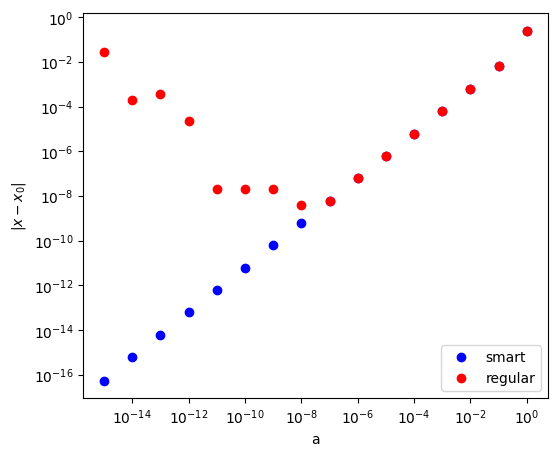

In [19]:
import numpy as np
import matplotlib.pyplot as plt

b=1.0
c=0.25
a=1.0
x=np.zeros(50)
y1=np.zeros(50)
y2=np.zeros(50)
n=0
while a > np.finfo(float).eps:
    x[n]=a
    d=b**2-4*a*c
    y1[n]=(-b+np.sqrt(d))/(2.0*a)
    y2[n]=-2*c/(b+np.sqrt(d))
    print("a={0:8.2e}, regular={1:22.16e}, smart={2:22.16e}"
          .format(x[n],y1[n],y2[n]))
    n+=1
    a=a/10.

plt.ioff()
plt.figure(figsize=(6,5))
plt.loglog(x[0:n],abs(y2[0:n]+0.25), 'ob', label='smart')
plt.loglog(x[0:n],abs(y1[0:n]+0.25), 'or', label='regular')
plt.legend(loc=4)
plt.xlabel('a')
plt.ylabel('$|x-x_0|$')
plt.show()

The result of smart formular Eq. {eq}`eq-quadratic-smart` approaches the correct limit as $a \rightarrow 0$.  On the other hand, standard formular {eq}`eq-quadratic-standard` becomes errorneous for $a<10^{-7}$.  In fact, a graduate student who was investing non-equilibrium thermal processes using hard disc molecular dynamics suffered from this error.


---
Last modified on 2/12/2024 by R. Kawai.